### [ Fish 깊이에 따른 무게 예측 ]
-	데이터셋 : fish.csv
-	피쳐 : 길이 Length
-	타겟 : 무게 Wegiht
-	학습방법 : 지도학습 - 회귀
-	알고리즘 : LinearRegression

[1] 모듈 로딩 

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # 선형회귀
# 오차 계산
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error

In [92]:
data = '../../Data/fish.csv'

In [93]:
# 데이터 로딩
# 농어 생선의 무게 와 길이
# skipfooter , skiprows , usecols
fish_df =  pd.read_csv('../Data/fish.csv', skiprows=73, header=None, skipfooter=31, engine='python', usecols=[1,2])

[2] 탐색적 분석

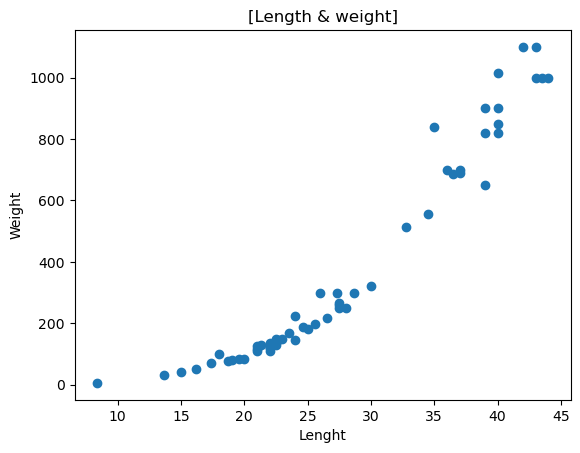

In [94]:
# 시각화
# 1번 컬럼 => Weight, 2번 컬럼 => Length
plt.plot(fish_df[2],fish_df[1],'o')
plt.xlabel('Lenght')
plt.ylabel('Weight')
plt.title('[Length & weight]')
plt.show()

[3] 데이터 셋 준비
*	피쳐와 타겟 분리 (학습용/검증용/테스트용) 데이터셋 분리

In [95]:
# [3-1] 피쳐와 타겟 분리
feature_df = fish_df[fish_df.columns[-1:]]
target_df = fish_df[fish_df.columns[0]]

print(f'feature_df => {feature_df.ndim}D, ftarget_df,  {target_df.ndim}D')

feature_df => 2D, ftarget_df,  1D


In [96]:
X_train, X_test , y_train, y_test = train_test_split(feature_df, target_df,test_size=0.2 , random_state=15)

In [97]:
trainDs = (X_train, y_train)  
testDs = (X_test, y_test)

# trainDs = (X_train, y_train)  
# testDs = (X_test, y_test)



lr = LinearRegression()

lr.fit(X_train, y_train)  

LinearRegression()

In [98]:
print(testDs)

(       2
41  36.5
16  22.0
22  22.7
24  23.5
14  21.3
20  22.5
36  28.7
51  40.0
55  43.5
30  26.5
38  32.8
49  40.0, 41     685.0
16     120.0
22     145.0
24     170.0
14     130.0
20     130.0
36     300.0
51     820.0
55    1000.0
30     218.0
38     514.0
49     900.0
Name: 1, dtype: float64)


In [99]:
# 결정된 파라미터 확인
print(f'가중치:{lr.coef_} 절편: {lr.intercept_}')

가중치:[36.42447503] 절편: -625.685674205166


In [100]:
# 평가

train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print(f'훈련점수:{train_score}, 테스트 점수:{test_score}')

훈련점수:0.9086157877970404, 테스트 점수:0.9575033871385509


In [101]:
# 학습용, 테스트용 DS 에 대한 모델 적합도, 비용 계산
def checkModel(trainDs, testDs, model):
	result= [] 	# 성능평가 결과 저장
	#print(trainDs, testDs)
	for data, label in [trainDs, testDs]:
		# -모델 즉, 수식에 데이터 적용해서 예측값
		pre_label = model.predict(data)
		# - 모델 적합도 : 높을수록 좋음(1,0)     
		score = model.score(data,label)
		# - 오차 계산 : 낮을수록 좋음(0.0)
		rmse = root_mean_squared_error(label, pre_label)
		mse = mean_squared_error(label, pre_label)
		mae = mean_absolute_error(label, pre_label) 
		# - 데이터셋 별 성능 결과 저장
		result.append([score,rmse,mse,mae])
	
	return pd.DataFrame(result)

In [102]:
result = checkModel(trainDs,testDs, lr)

print(type(result[0]))

<class 'pandas.core.series.Series'>


In [103]:
result

,0,1,2,3
0,0.908616,104.356515,10890.282298,81.532178
1,0.957503,66.711344,4450.403481,57.703191


In [104]:
#resultDf = pd.DataFrame(data=result, columns=['score','rmse','mse','mae'], index=['Train','Test'])
resultDf = pd.DataFrame(data=result)
resultDf.index , resultDf.columns 

(RangeIndex(start=0, stop=2, step=1), RangeIndex(start=0, stop=4, step=1))

In [105]:
resultDf.columns= ['score','rmse','mse','mae']

In [106]:
resultDf

,score,rmse,mse,mae
0,0.908616,104.356515,10890.282298,81.532178
1,0.957503,66.711344,4450.403481,57.703191


In [107]:
resultDf.index = ['Train','Test']

In [108]:
resultDf

,score,rmse,mse,mae
Train,0.908616,104.356515,10890.282298,81.532178
Test,0.957503,66.711344,4450.403481,57.703191


In [109]:
# 훈련용과 테스트용 성능차이 행 추가
resultDf.loc['diff'] = (resultDf.loc['Train'] - resultDf.loc['Test'] ).abs()
resultDf

,score,rmse,mse,mae
Train,0.908616,104.356515,10890.282298,81.532178
Test,0.957503,66.711344,4450.403481,57.703191
diff,0.048888,37.645171,6439.878817,23.828987


# [학습 결과 분석]
* 모델 적합도 : Train > Test : 과대적합
* 비용 계산 : Train < Test : 과대적합

- [해결방안]
* 과도한 반복 학습 => scikit-learn 에서는 개발자 제어불가 X
* 모델 복잡한가? => 데이터 충분하지않음
* 해당 알고리즘의 결과물 분석 => 선형식 과 데이터의 관계 => 완벽한 선형이 아님, 오히려 곡선

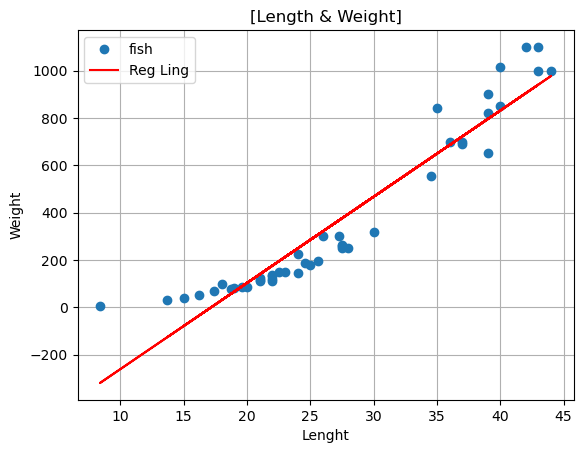

In [110]:
# 데이터 시각확 
plt.plot(X_train, y_train, 'o', label= 'fish')

# 선형회귀에서 구한 
plt.plot(X_train, lr.predict(X_train),'r-', label = 'Reg Ling')
plt.xlabel('Lenght')
plt.ylabel('Weight')
plt.title('[Length & Weight]')
plt.legend()
plt.grid()
plt.show()

[모델 성능평가에서의 문제점 개선을 위해서 추가 작업]
- 손실 / 비용함수 값이 큼 -> 직선 형태가 아닌 곡선형태의 수식을 사용 < 차수를 증가
- 기존 존재하는 피쳐 활용해서 피쳐 생성 -> 다항회귀 방식 사용

[6] 특성 공학 > 피쳐 생성 후 추가

- 관련 모듈 로딩
- 학습 진행 전에 전처리 단계에서 피쳐를 추가 

In [111]:
# [6-1] 모듈로딩
from sklearn.preprocessing import PolynomialFeatures

In [112]:
# [6-2] PolynomialFeatures 클래스 사용법
# - 임시데이터
X = [[1,2]]
X

## - 객체 / 인스턴스 생성 : [기본 : 차수 2]
poly = PolynomialFeatures(degree=3) # 차수 늘리기 / 차수를 늘릴수록 복잡해짐. 일단 기본값으로 2차수를 줌 그런데 내 데이터도 그렇다는 보장이 없음.

# - 객체 / 인스턴스에 데이터 피쳐 생성 할 정보 제공
poly.fit(X) # < 2차원 삽입

poly.n_features_in_ # 피쳐 갯수 파악
# poly. # < 언더바 있는 것들은 속성

2

In [113]:
print('poly.n_features_in_: ', poly.n_features_in_)
print('poly.n_output_features_: ', poly.n_output_features_)

# 피쳐 생성 후 추가
poly.transform(X)

poly.n_features_in_:  2
poly.n_output_features_:  10


array([[1., 1., 2., 1., 2., 4., 1., 2., 4., 8.]])

In [114]:
## - 객체 / 인스턴스 생성 : [기본 : 차수 2]
poly = PolynomialFeatures(interaction_only=True) # 제곱값 사용 하지 않는다는 설정 / 피쳐끼리 곱셈값만 적용 
# - 객체 / 인스턴스에 데이터 피쳐 생성 할 정보 제공 		ㄴ 다 들어가는거보다는 삽입 값 감소 
poly.fit(X) # < 2차원 삽입

poly.n_features_in_ # 피쳐 갯수 파악
# poly. # < 언더바 있는 것들은 속성
print('poly.n_features_in_: ', poly.n_features_in_)
print('poly.n_output_features_: ', poly.n_output_features_)

# 피쳐 생성 후 추가
poly.transform(X)

poly.n_features_in_:  2
poly.n_output_features_:  4


array([[1., 1., 2., 2.]])

In [115]:
## - 객체 / 인스턴스 생성 : [기본 : 차수 2]
poly = PolynomialFeatures(include_bias= False, interaction_only=True) # 해당값은 빼고 사용한다는 뜻? 
# - 객체 / 인스턴스에 데이터 피쳐 생성 할 정보 제공 		
poly.fit(X) # < 2차원 삽입

poly.n_features_in_ # 피쳐 갯수 파악
# poly. # < 언더바 있는 것들은 속성
print('poly.n_features_in_: ', poly.n_features_in_)
print('poly.n_output_features_: ', poly.n_output_features_)

# 피쳐 생성 후 추가
poly.transform(X)

poly.n_features_in_:  2
poly.n_output_features_:  3


array([[1., 2., 2.]])

In [116]:
## - 객체 / 인스턴스 생성 : [기본 : 차수 2]
poly = PolynomialFeatures(include_bias= False) # 절편값 1 제외
# - 객체 / 인스턴스에 데이터 피쳐 생성 할 정보 제공 		
poly.fit(X) # < 2차원 삽입

poly.n_features_in_ # 피쳐 갯수 파악
# poly. # < 언더바 있는 것들은 속성
print('poly.n_features_in_: ', poly.n_features_in_)
print('poly.n_output_features_: ', poly.n_output_features_)

# 피쳐 생성 후 추가
poly.transform(X)

poly.n_features_in_:  2
poly.n_output_features_:  5


array([[1., 2., 1., 2., 4.]])

In [117]:
## - 객체 / 인스턴스 생성 : [기본 : 차수 2]
poly = PolynomialFeatures(include_bias= False) # 절편값 1 제외

# - 객체 / 인스턴스에 데이터 피쳐 생성 할 정보 제공 + 피쳐 생성 후 추가
X2 = poly.fit_transform(X)

poly.n_features_in_ # 피쳐 갯수 파악
# poly. # < 언더바 있는 것들은 속성
print('poly.n_features_in_: ', poly.n_features_in_)
print('poly.n_output_features_: ', poly.n_output_features_)
print(X2) # 피쳐 정보 제공 및 피쳐 생성 후 추가를 한꺼번에 적용

poly.n_features_in_:  2
poly.n_output_features_:  5
[[1. 2. 1. 2. 4.]]


In [118]:
# 클래스 개념 짚고 가기

class Dog:
    def __init__(self, name):
        self.name = name

# Dog 클래스의 인스턴스 생성
dog1 = Dog("Buddy")  # dog1은 Dog 클래스의 인스턴스이자 객체!
dog2 = Dog("Charlie")  # dog2도 마찬가지!

# 모든 인스턴스는 객체지만, 모든 객체가 인스턴스는 아닙니다!
print(isinstance(dog1, Dog))  # True (dog1은 Dog 클래스의 인스턴스)


True


In [119]:
# [6-3] 데이터 셋 / 학습용 / 테스트용 데이터셋 피쳐 추가
# - 학습용 : X_train
# - 테스트용 : X_test 

# 학습용 데이터를 기반으로 패턴과 규칙을 찾음(학습이 진행됨)
# - 학습용 데이터셋으로 피쳐 추가 정보 제공 

poly =PolynomialFeatures()

# 학습용 데이터 피쳐 제공

poly.fit(X_train)

# -> 학습용 / 테스트용 피쳐 추가
poly_train = poly.transform(X_train)
poly_test = poly.transform(X_test)



In [120]:
print(f"[학습용 피쳐] > {type(poly_train)}, {poly_train.shape}")
print(f"[테스트용 피쳐] > {type(poly_test)},{poly_test.shape}")

[학습용 피쳐] > <class 'numpy.ndarray'>, (45, 3)
[테스트용 피쳐] > <class 'numpy.ndarray'>,(12, 3)


[7] 재학습


In [121]:
# - 선형회귀 인스턴스 생성
model = LinearRegression()

# 학습
model.fit(poly_train, y_train) # 피쳐와 타겟 

LinearRegression()

In [122]:
# 모델 파라미터 확인
print(f"coef_ : {model.coef_}, \nintercept_ : {model.intercept_} ")


'''
coef_ : [  0.         -20.96514464   0.98999509], 
intercept_ : 117.15708885972202 


'''

coef_ : [  0.         -22.74527835   1.03280774], 
intercept_ : 135.5853286293451 


'\ncoef_ : [  0.         -20.96514464   0.98999509], \nintercept_ : 117.15708885972202 \n\n\n'

[8] 재학습 평가

In [123]:
# [8-1] 시각화 - 곡선 회귀선
import numpy as np


# - 곡선 회귀식에 대입할 데이터
x = np.linspace(1,42) # 1 <= ~ <= 42 범위에서 균등하게 50개[기본값] 데이터 생성 / 설정한다면 범위 이상으로 값 추가 가능 < nums 파라미터
# ㄴ 추후 생선에는 1인애가 없으니 최솟값과 최댓값 구해서 넣어도 좋을듯.
print(f"shape: {x.shape}") #
print(x)


shape: (50,)
[ 1.          1.83673469  2.67346939  3.51020408  4.34693878  5.18367347
  6.02040816  6.85714286  7.69387755  8.53061224  9.36734694 10.20408163
 11.04081633 11.87755102 12.71428571 13.55102041 14.3877551  15.2244898
 16.06122449 16.89795918 17.73469388 18.57142857 19.40816327 20.24489796
 21.08163265 21.91836735 22.75510204 23.59183673 24.42857143 25.26530612
 26.10204082 26.93877551 27.7755102  28.6122449  29.44897959 30.28571429
 31.12244898 31.95918367 32.79591837 33.63265306 34.46938776 35.30612245
 36.14285714 36.97959184 37.81632653 38.65306122 39.48979592 40.32653061
 41.16326531 42.        ]


In [124]:
# 곡선 회귀식 : y = x^0*w0 x^1*w1 x^2*w2 + b(intercept_)
y = (1 * model.coef_[0]) + (x * model.coef_[1]) + ((x**2) * model.coef_[2]) + model.intercept_
# x^0, x^1, x^2 = 1, 3 , 9 < 제곱된 값이 들어와서 1 3 9 로 표시

print(f"shape: {y.shape}") #
print(x)

shape: (50,)
[ 1.          1.83673469  2.67346939  3.51020408  4.34693878  5.18367347
  6.02040816  6.85714286  7.69387755  8.53061224  9.36734694 10.20408163
 11.04081633 11.87755102 12.71428571 13.55102041 14.3877551  15.2244898
 16.06122449 16.89795918 17.73469388 18.57142857 19.40816327 20.24489796
 21.08163265 21.91836735 22.75510204 23.59183673 24.42857143 25.26530612
 26.10204082 26.93877551 27.7755102  28.6122449  29.44897959 30.28571429
 31.12244898 31.95918367 32.79591837 33.63265306 34.46938776 35.30612245
 36.14285714 36.97959184 37.81632653 38.65306122 39.48979592 40.32653061
 41.16326531 42.        ]


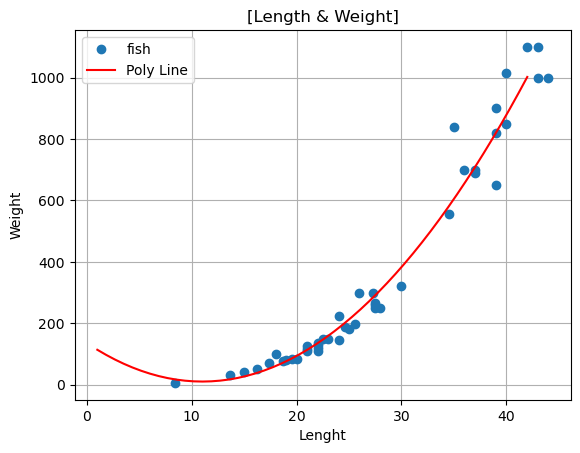

In [125]:
# 시각화 및 회귀선
# 데이터 시각화
plt.plot(X_train, y_train, 'o', label = 'fish')

plt.plot(x ,y , 'r-', label = 'Poly Line')

plt.xlabel('Lenght')
plt.ylabel('Weight')
plt.title('[Length & Weight]')
plt.legend()
plt.grid()
plt.show()

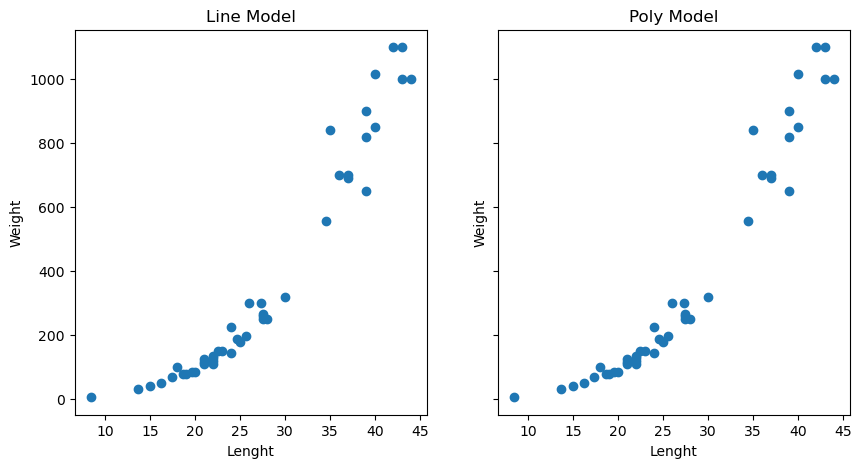

In [126]:
fig, axes = plt.subplots(1,2, figsize = (10,5), sharey=True) # sharey < y축은 공유하겠다.

axes = axes.flatten() # < 2차원으로 들어온 것 1차원으로 reshape / [[],[]] > [ , ]

for ax, title in zip(axes, ['Line Model', 'Poly Model']): # 코드 기억하십쇼
    ax.plot(X_train,y_train, 'o', label = 'Fish')
    ax.set_xlabel('Lenght')
    ax.set_ylabel('Weight')
    ax.set_title(title)


plt.show()

In [127]:
# 무시
# # 데이터 시각확 
# plt.plot(X_train, y_train, 'o', label= 'fish')

# # 선형회귀에서 구한 
# plt.plot(X_train, lr.predict(X_train),'r-', label = 'Reg Ling')
# plt.xlabel('Lenght')
# plt.ylabel('Weight')
# plt.title('[Length & Weight]')
# plt.legend()
# plt.grid()
# plt.show()

In [128]:
# 무시
# # 시각화 및 회귀선
# # 데이터 시각화
# plt.plot(X_train, y_train, 'o', label = 'fish')

# plt.plot(X_train, lr.predict(X_train),'g-', label = 'Reg Ling')

# plt.plot(x ,y , 'r-', label = 'Poly Line')

# plt.xlabel('Lenght')
# plt.ylabel('Weight')
# plt.title('[Length & Weight]')
# plt.legend()
# plt.grid()
# plt.show()

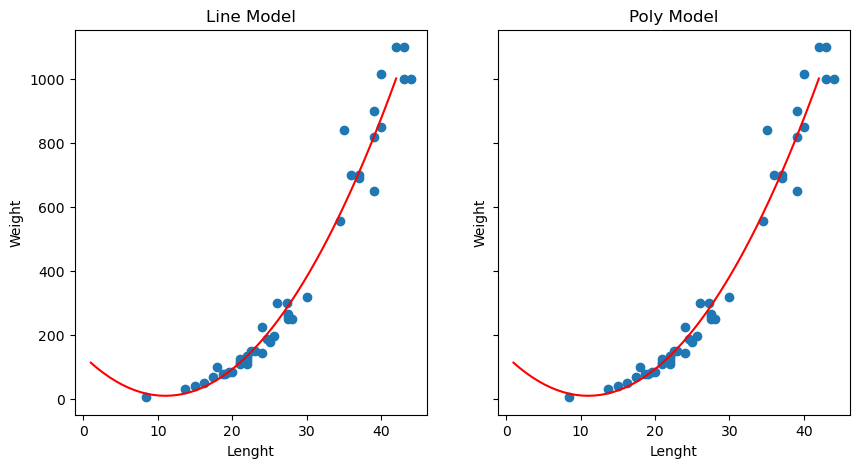

In [129]:
fig, axes = plt.subplots(1,2, figsize = (10,5), sharey=True) # sharey < y축은 공유하겠다.

axes = axes.flatten() # < 2차원으로 들어온 것 1차원으로 reshape / [[],[]] > [ , ]

for ax, title in zip(axes, ['Line Model', 'Poly Model']): # 코드 기억하십쇼
    ax.plot(X_train,y_train, 'o', label = 'Fish')
    ax.plot(x ,y , 'r-', label = 'Poly Line')
    ax.set_xlabel('Lenght')
    ax.set_ylabel('Weight')
    ax.set_title(title)
    
plt.show()


ValueError: X has 1 features, but LinearRegression is expecting 3 features as input.

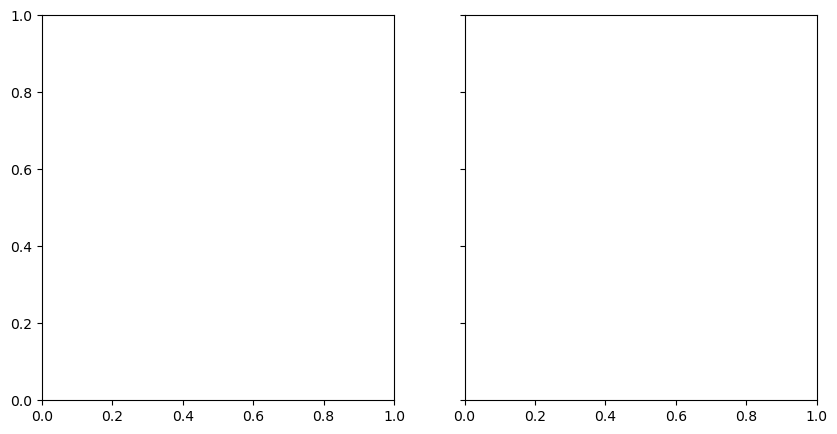

In [130]:
# 적다가 마심

fig, axes = plt.subplots(1,2, figsize = (10,5), sharey=True) # sharey < y축은 공유하겠다.

axes = axes.flatten() # < 2차원으로 들어온 것 1차원으로 reshape / [[],[]] > [ , ]
data_label = [[X_train, model.predict(X_train)], [x, y]]

for ax, title, data in zip(axes, ["Line Model", "Poly Model"],data_label):
    ax.plot(X_train, y_train, 'o', label='Fish')
    ax.plot(data[0], data[1], 'r-', label='Poly Line')
    ax.set_xlabel("LENGTH")
    ax.set_ylabel("WEIGHT")
    ax.set_title(title)

plt.suptitle("[ Compare LineRegression & PolyLineRegression ]")
plt.show()

In [ ]:
# zip 복습

nums = [10,20]
title = ['train','test']
names = ['hong', 'mm']
sign = ['★', '♥']

result = zip(nums, title, names, sign)
for r in result: # 언패킹 가능
    print(r)
    
# 동일한 인덱스끼리 묶어서 튜플로 출력

(10, 'train', 'hong', '★')
(20, 'test', 'mm', '♥')


In [ ]:
# 언패킹한 케이스
result = zip(nums, title, names, sign)
for r1, r2, r3, r4 in result:
    print(r1,r2,r3,r4)

10 train hong ★
20 test mm ♥
